In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
df = pd.read_csv(r'C:\Users\hb292\Downloads\diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


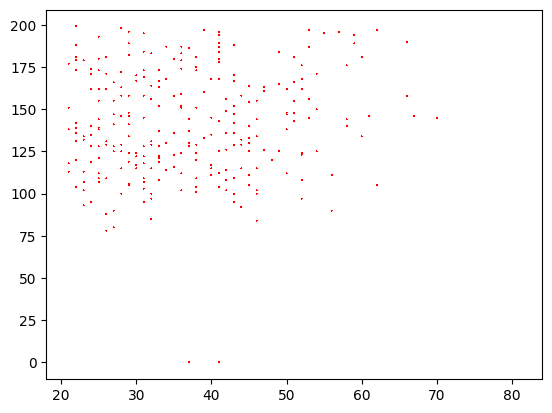

In [3]:
plt.scatter(df.Age, df.Glucose,df.Outcome,marker="+",color='red')

In [4]:
df.shape

(768, 9)

In [5]:
from sklearn.model_selection import train_test_split
X = df[['Age','Glucose']]
Y = df.Outcome
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2)

In [6]:
X_test

,Age,Glucose
514,24,99
678,25,121
518,41,76
90,21,80
644,27,103
...,...,...
103,24,81
720,34,83
459,81,134
424,36,151


In [7]:
Y_train

149    0
510    1
199    1
728    0
292    1
      ..
577    1
749    1
120    1
711    0
45     1
Name: Outcome, Length: 614, dtype: int64

In [8]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [9]:
model.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [10]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0])

In [11]:
model.score(X_test,Y_test)

0.6623376623376623

In [12]:
#probabilities betwween 0 and 1
model.predict_proba(X_test)

array([[0.872875  , 0.127125  ],
       [0.74142313, 0.25857687],
       [0.91771251, 0.08228749],
       [0.93885673, 0.06114327],
       [0.84566863, 0.15433137],
       [0.35303211, 0.64696789],
       [0.62211385, 0.37788615],
       [0.73526921, 0.26473079],
       [0.64476177, 0.35523823],
       [0.76713745, 0.23286255],
       [0.90745641, 0.09254359],
       [0.9272006 , 0.0727994 ],
       [0.33153497, 0.66846503],
       [0.6441398 , 0.3558602 ],
       [0.76103567, 0.23896433],
       [0.67796995, 0.32203005],
       [0.24252779, 0.75747221],
       [0.58501727, 0.41498273],
       [0.92860527, 0.07139473],
       [0.619884  , 0.380116  ],
       [0.91606173, 0.08393827],
       [0.4827138 , 0.5172862 ],
       [0.72458891, 0.27541109],
       [0.11751131, 0.88248869],
       [0.82617449, 0.17382551],
       [0.07274295, 0.92725705],
       [0.68502861, 0.31497139],
       [0.39390059, 0.60609941],
       [0.36142801, 0.63857199],
       [0.6953111 , 0.3046889 ],
       [0.

In [13]:
y_pred = model.predict_proba(X_test)[::,1]

fpr, tpr, _ = roc_curve(Y_test,  y_pred)

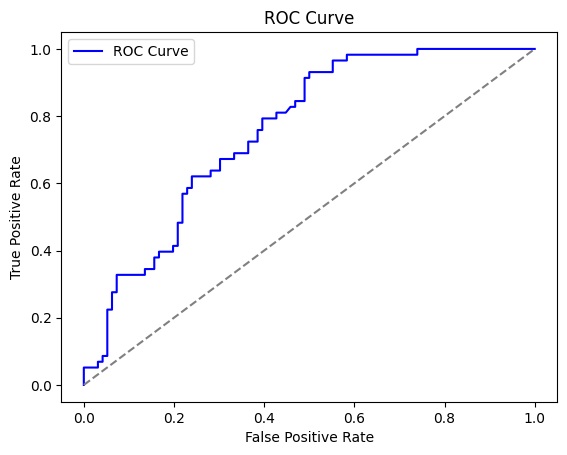

In [14]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [15]:
auc = roc_auc_score(Y_test, y_pred)
print("AUC:", auc)

AUC: 0.7570941091954023
